# Scenario Social media research (Sonja)

Sonja (pseudonym) is a media scholar and analyzes online debates on social media platforms. She is interested in the ways people debate certain issues online (e.g. climate change, COVID19) or how and why they debate (e.g. political deliberation, hate speech, faktoids). In the past, she focused on post-video discussions on YouTube and debates on Twitter, but plans to focus on other platforms in the future (e.g. Telegram, Reddit). Her main empirical material consists of the postings (e.g. tweets) arranged in a list. Sonja typically uses qualitative coding techniques for theory buidling (e.g. grounded theory) to make sense of the data. She would label the data items by hand in MS Excel, then iteratively refine her codes ("labels") and compare the data with existing theories from media studies and social science literature. Sonja also experimented with qualitative data analysis software (MAXQDA) to do this kind of work, which recently added functionalities for social media text analysis. She decided, however, that the functionalities are not helpful for his purposes or impede the way she likes to structure her data coding and analysis.

The main challenge for Sonja is to become familiar with relatively large datasets, identify interesting data points and get hold of changing dynamics in the discussion of a subject. She typically spends a lot of time scrolling through the data and looking for these elements. Much of the data is actually not particularly interesting for her and hidden gems may only appear after long sessions of such scrolling and diagonal reading. It would be great to have technical instruments available to gain new perspectives and 'surface' interesting data points and their relationships.

Sonja has basic knowledge of programming languages for data science (R, Python) and is familiar with data analysis software used in social media analysis (e.g. network analysis). She is open and ready to set up his own programming environment (e.g. a Jupyter Notebook) and is interested to incorporate and experiment with state-of-the-art technologies (e.g. machine learning).

**Note: For this example we use a dataset from https://www.kaggle.com/edqian/twitter-climate-change-sentiment-dataset. The dataset has been created by Edward Qian. The Tweets contained in the dataset are annotated manually with the sentiment they express towards climate change. "Each tweet is labelled as one of the following classes:, 2(News): the tweet links to factual news about climate change, 1(Pro): the tweet supports the belief of man-made climate change, 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change, -1(Anti): the tweet does not believe in man-made climate change"
We are not using the sentiment labels in this example, because we are only interested in the content of the tweet and want to simulate an unexplored dataset. Therefore, we drop the labels after loading the data.**

# Sonja's Approach

Sonja uses a range of machine learning and visualization techniques that support her in getting familiar with large datasets and finding interesting data.

Sonja is interested in the discourse on COVID-19 on Twitter. She downloaded a dataset using the Twitter API and is interested in analyzing the content of the tweets.

She uses modules from the Reflexive ML Toolbox to analyze her data.
Her two main interests are 
1. mapping out the topics people talk about in her data.
2. analyzing how interest in certain topics changed over time.

She follows the following procedure:
1. Setup
2. Load Data
3. Preprocess Data
4. Embed data with a pretrained language model
5. Reduce dimensionality of embedded data
6. Cluster similar data
7. Extract information about Clusters
8. Interpret and label clusters
9. Visualize interest in topics over time

This notebook follows this procedure. Each step is explained at the corresponding position.

In practice, Sonja does not work with the notebook linearly. Instead, she goes back and forth between the steps and optimizes the model until she finds a topic she is interested in.

# Setup
Sonja starts by setting up the enviroment she wants to work in.

The Reflexive ML Toolbox relies on external packages that provide useful functionality. For instance, the package *pandas* provides functionality for working with spreadsheet-like data.
These libraries have to be installed to the system that runs the Jupyter Notebook and subsequently loaded (or imported) into the notebook so they can be used in the code.

## Install Packages

Some of the libraries used in this notebook are not installed by default. 
We use the package manager Anaconda to install the missing libraries. 
See the Setup.txt for a step-by-step guide on how to set up Jupyter Lab and Anaconda.

In [1]:
install = False
if install:
    !conda install -c conda-forge html2text -y
    !conda install -c conda-forge sentence-transformers -y
    !conda install pandas --y
    !conda install -c conda-forge matplotlib -y
    !conda install -c conda-forge umap-learn -y
    !conda install -c conda-forge scikit-learn-extra -y
    !conda install -c districtdatalabs yellowbrick -y

## Imports
We need some libraries to run our code. After importing them into our notebook, we can use them.

We use the following Libraries:

*NumPy (np)* 'is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.' (https://en.wikipedia.org/wiki/NumPy

*Pandas (pd)* 'is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.' (https://pandas.pydata.org/) Pandas represents data in a spreadsheet-like format and allows us to manipulate it accordingly.

*sentence_transformers* 'SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in our paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.
You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining. The framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks. Further, it is easy to fine-tune your own models.' (https://www.sbert.net/)

*matplotlib* 'Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.' (https://matplotlib.org/)

In [2]:
import numpy as np

import pandas as pd

from sentence_transformers import SentenceTransformer,util

from html2text import HTML2Text
from tqdm import tqdm

import matplotlib.pyplot as plt

## Set Pandas print options

To get more readable outputs when printing our data in Pandas, we set some print options.

In [3]:
#pandas print options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load Data

Data Source: https://www.kaggle.com/edqian/twitter-climate-change-sentiment-dataset 

The data is formatted as comma-separated values (csv) and saved as a .csv-file.
We load the data using pandas which will allow us to treat it like a spreadsheet with rows and columns.
Further, we specify, which column contains the text of the tweets.

In [35]:
data = pd.read_csv("twitter_sentiment_data_dates.csv", encoding="'UTF-8'")
text_column = 'message'

We print the first 10 rows of our spreadsheet to make sure we loaded the data correctly.

In [36]:
data.head(10)

,sentiment,message,tweetid,publishedAt
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840,2019-10-20
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641,2019-12-27
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256,2019-08-13
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904,2019-08-09
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153,2020-05-12
5,0,Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X,793125429418815489,2020-10-01
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125430236684289,2019-08-03
7,2,"RT @CCIRiviera: Presidential Candidate #DonaldTrump is Ã¢â‚¬Å“dangerousÃ¢â‚¬ï† on climate change, says #monaco Ã¢â‚¬â„¢s Prince AlbertÃ¢â‚¬Â¦",793126558688878592,2019-11-19
8,0,RT @AmericanIndian8: Leonardo DiCaprio's climate change documentary is free for a week https://t.co/ITpdZ6kCeg\n#INDIGENOUS #TAIRP https://tÃ¢â‚¬Â¦,793127097854197761,2020-10-03
9,1,"#BeforeTheFlood Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change... https://t.co/HCIZrPUhLF",793127346106753028,2020-07-30


# Preprocessing

Some preprocessing can be done to produce better embeddings. This step higly depends on the input data. For interviews, we could for example parse out speaker names, such as \*Interviewer says\*:

## Drop unused rows and columns

If Tweets do not contain any text, we drop them, because they would distort results.

Further, we are not interested in the sentiment annotations, so we drop the corresponding column.

In [37]:
data = data.dropna(subset=[text_column]) # drop rows with no content
data = data.drop(['sentiment'], axis = 1)
data.head()

,message,tweetid,publishedAt
0,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840,2019-10-20
1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641,2019-12-27
2,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256,2019-08-13
3,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904,2019-08-09
4,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153,2020-05-12


We exclude retweets to prevent identical samples.

In [38]:
data = data[~data[text_column].str.startswith("RT")].reset_index(drop=True)
data.shape

(18866, 3)

## Remove HTML Tags, Links, User names, new lines

Before we analyze the tweets with our model we clean them to imporve performance.
We filter out:
- HTML-tags
- Links
- New-Line commands

In [39]:
# Remove HTML tags
tqdm.pandas()
h = HTML2Text()
h.ignore_links = True
data['cleaned'] = data[text_column].progress_apply(lambda x: h.handle(x))
print( "Removed HTML Tags")

# Remove links
http_link_pattern = r'http\S+'
bitly_link_pattern = r'bit.ly/\S+'
data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
print( "Removed Links")
  
# Remove new line \n
new_line_pattern = r'\n'
data['cleaned'] = data['cleaned'].str.replace(new_line_pattern, ' ')
print( "Removed new line \n")

data.head()

100%|██████████| 18866/18866 [00:02<00:00, 8527.95it/s]
<ipython-input-39-7e865067b37e>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')


Removed HTML Tags
Removed Links
Removed new line 



<ipython-input-39-7e865067b37e>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
<ipython-input-39-7e865067b37e>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned'] = data['cleaned'].str.replace(new_line_pattern, ' ')


,message,tweetid,publishedAt,cleaned
0,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840,2019-10-20,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256,2019-08-13,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. via @youtube
2,Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X,793125429418815489,2020-10-01,Unamshow awache kujinga na iko global warming
3,"#BeforeTheFlood Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change... https://t.co/HCIZrPUhLF",793127346106753028,2020-07-30,"#BeforeTheFlood Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change..."
4,"Bangladesh did not cause climate change, so the country does not need Ã¢â‚¬Å“aidÃ¢â‚¬ï†; instead it needs compensation for theÃ¢â‚¬Â¦ https://t.co/ecGXgRNROP",793129746003615745,2019-06-30,"Bangladesh did not cause climate change, so the country does not need Ã¢â‚¬Å“aidÃ¢â‚¬ï†; instead it needs compensation for theÃ¢â‚¬Â¦"


# Embed Data with Universal Sentence Encoder

We want to analyze the content of the tweets with machine learning. For this, we use a model that extracts information. about the content of the tweets. 
Conceptually, the model produces a vector for each of the tweets. The direction of the vectors corrsponds to the tweets' semantic meaning. 
If two vectors point in a similar direction, their semantic meaning is similar.

For example, the tweets "Climate change is dangerous" and "We have to be aware of the dangers of climate change" are similar in meaning so their vectors would point in similar directions. 
The tweet "Polar bears will go extinct" is not as similar to the aforementioned tweets, so it's vector will point to a different direction.

The process of assigning a vector to a piece of text is called *embedding*. 

We use a pretrained neural language model to produce embeddings of the tweets.
The model has been trained with different datasets and has learned a general representation of the semantics of natural language. 

The model we use is called Universal Sentence Encoder:
USE_Multilingual (hosted at: sbert.net , Paper: Yang, Y., Cer, D.M., Ahmad, A., Guo, M., Law, J., Constant, N., Ábrego, G., Yuan, S., Tar, C., Sung, Y., Strope, B., & Kurzweil, R. (2020). Multilingual Universal Sentence Encoder for Semantic Retrieval. ACL.)
(https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/) 

First, we load the model into the notebook and then we assign embeddings to the tweets.

## Load Model

Before we can use the model we have to download it.


In [40]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v1/')

## Embed documents

Then we can pass the tweets into the model and it will return embeddings.

For each tweet (i.e. each row in the data frame) one embedding is generated.

In [41]:
batch_size_parameter = 128
print('Embedding...')
data_to_embed = data['cleaned']
embeddings = model.encode(data_to_embed, convert_to_tensor=True, batch_size = batch_size_parameter, show_progress_bar = True)

Embedding...


Batches:   0%|          | 0/148 [00:00<?, ?it/s]

The embeddings are returned as a matrix. Each row in the matrix corresponds to one tweet. Each column corresponds to one dimension of the vectors. Therefore, the matrix has the shape: (number of sentences, number of embedding dimensions)

In [42]:
print(embeddings.shape)
embeddings[:10]

torch.Size([18866, 512])


tensor([[-4.6968e-02, -7.7402e-02, -1.9320e-02,  ...,  1.7619e-02,
          5.0784e-03,  1.2681e-02],
        [ 1.5901e-02, -9.0975e-02, -3.0791e-02,  ..., -2.0671e-02,
         -5.7735e-04,  2.3119e-02],
        [ 5.6255e-03, -6.8567e-02,  1.5634e-02,  ..., -4.3354e-02,
         -3.5120e-02,  3.4669e-02],
        ...,
        [-7.3171e-02, -3.6846e-03, -6.7659e-02,  ...,  9.0373e-03,
          3.6213e-02, -7.4100e-04],
        [ 2.5374e-02, -6.2420e-02, -8.8677e-03,  ..., -2.6728e-02,
         -9.8171e-03,  2.0913e-02],
        [ 8.8709e-03, -3.0195e-02, -2.2284e-02,  ..., -1.9723e-02,
         -7.6648e-07, -1.1837e-03]])

# Reduce dimensionality with UMAP
The embedding vectors assigned to the tweets are high-dimensional. In this case, the dimensionality is 512. 
We reduce the dimensionality to 200 to make it easier for the following algorithm to find clusters of similar tweets.
Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP) is used for dimensionality reduction. (https://umap-learn.readthedocs.io/en/latest/)

McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018

An intuitive explanation of UMAP can be found at: https://pair-code.github.io/understanding-umap/

In [43]:
import umap as umap

In [44]:
num_dimensions =200


reducer = umap.UMAP(n_neighbors=30, 
                     n_components=num_dimensions, 
                     metric='cosine',
                    verbose = True,
                    init='spectral',
                     min_dist=.1,
                     #spread=5.0, 
                     #set_op_mix_ratio=1.0, 
                     #local_connectivity=1.0, 
                     #negative_sample_rate=5, 
                     #transform_queue_size=4.0, 
                     force_approximation_algorithm=True, 
                     unique=False
                      )
embeddings_umap = reducer.fit_transform(embeddings)
  

embeddings_reduced = embeddings_umap

UMAP(angular_rp_forest=True, dens_frac=0.0, dens_lambda=0.0,
     force_approximation_algorithm=True, metric='cosine', n_components=200,
     n_neighbors=30, verbose=True)
Construct fuzzy simplicial set
Wed Aug 11 15:04:05 2021 Finding Nearest Neighbors
Wed Aug 11 15:04:05 2021 Building RP forest with 12 trees
Wed Aug 11 15:04:06 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Wed Aug 11 15:04:24 2021 Finished Nearest Neighbor Search
Wed Aug 11 15:04:27 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Aug 11 15:06:14 2021 Finished embedding


We can compare embeddings before and after dimensionality reduction by visually expecting their first two dimensions of the vectors.
We use scatterplots in which each (blue) dot corresponds to one of the tweets.
The first plot shows points seemingly randomly spread around the center of the plot.
In the second plot disctinct clusters are visible.

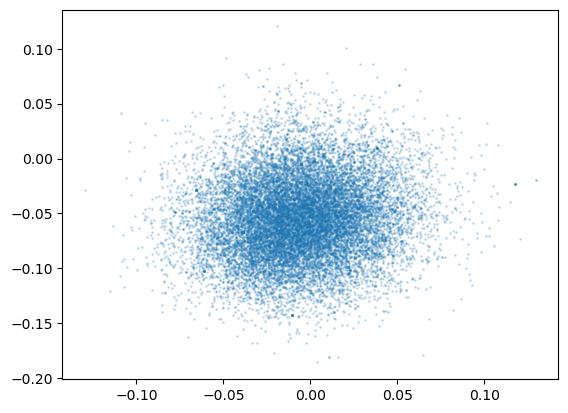

In [45]:
plt.scatter(embeddings[:, 0], embeddings[:,1], alpha=0.2, s = 1)
plt.show()

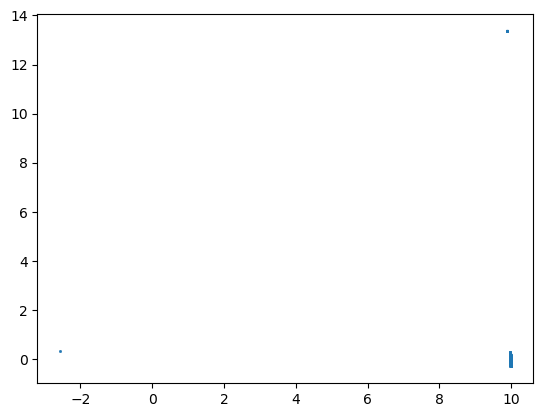

In [46]:
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:,1], alpha=0.2, s = 1)
plt.show()

# Cluster tweets with K-Medoids

We are interested in the topics discussed in the among the tweets.
To do this, we want to find clusters of similar similar embeddings which stand for semantically similar comments. 
We use a method called K-Medoids (https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html#sklearn_extra.cluster.KMedoids)

Maranzana, F.E., 1963. On the location of supply points to minimize transportation costs. IBM Systems Journal, 2(2), pp.129-135.

Park, H.S.and Jun, C.H., 2009. A simple and fast algorithm for K-medoids clustering. Expert systems with applications, 36(2), pp.3336-3341.

For an intuitive explanation of the K-Medoids algorithm, see: https://medium.com/analytics-vidhya/what-is-k-medoid-clustering-why-and-how-b4e518c49e10

**Note: The number of clusters we want to find has to be specified when using K-Medoids. Normally, it is not known beforehand, how many clusters are in the data. Several methods exist to find the otimal number of clusters, for example the elbow method (https://en.wikipedia.org/wiki/Elbow_method_(clustering)), or the Silhouette Score (https://en.wikipedia.org/wiki/Silhouette_(clustering)). For brevity, we assume the optimal number of clusters is set without any additional methods, but instead determined by iterative clustering and expection of the resulting clusters.**

In [48]:
from sklearn_extra.cluster import KMedoids

In [50]:
number_of_clusters =  32

clustering = KMedoids(n_clusters=number_of_clusters,  init='k-medoids++').fit(embeddings_reduced)
labels = clustering.labels_
data["label_kmedoids"] = labels
print("cluster","members", data["label_kmedoids"].value_counts().sort_values())
medoids_indices = clustering.medoid_indices_

cluster_method = 'label_kmedoids'

cluster members 26       6
31       8
23       9
20       9
28      27
8       30
9       38
22      39
29     106
15     134
24     188
6      196
14     250
21     323
19     334
4      356
27     438
11     480
13     551
3      560
30     583
2      719
17     954
12     976
25    1110
18    1112
1     1356
5     1399
10    1413
16    1491
7     1551
0     2120
Name: label_kmedoids, dtype: int64


# Extract information about Clusters

## Calculate Distance between Comments and closest cluster center

An advantage of the K-Medoids algorithm is the fact that each cluster is represented by one of the tweets. This tweet is the center of that cluster. This allows us to more quickly make sense of what the cluster could be about by looking at it's center.

We calculate the distance between each tweet and it's closest cluster center. We can then sort the tweets in one cluster by their distance the cluster center

In [53]:
from sklearn.metrics import pairwise_distances
distances = np.diag(pairwise_distances(X = clustering.cluster_centers_[labels], Y = embeddings_reduced[:], metric='cosine'))
data["distance_kmedoids"] = distances

## Calculate Topwords of clusters using TF-IDF

To help us with finding interesting clusters, we want to find what words are most important in each of the clusters. 
For this, we use TF-IDF (https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to find the topwords for each of the clusters.

In [54]:
import warnings
warnings.filterwarnings('ignore')

cluster_number = 0
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

data['topwords'] = ''  
for i in range(number_of_clusters):
  countVec = CountVectorizer(stop_words=stopwords)
  #countVec = CountVectorizer()

  data_tfidf = data[data[cluster_method]==i]

  countVec.fit(data_tfidf["cleaned"])
  
  list(countVec.vocabulary_.items())

  #%%
  #convert to bag of words
  #sparse matrix representation? (README: could use an edit/explanation)
  countVec_count = countVec.transform(data_tfidf["cleaned"])

  #%%
  #make array from number of occurrences
  occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

  #make a new data frame with columns term and occurrences, meaning word and number of occurences
  bowListFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'occurrences': occ})
  #print(bowListFrame)

  #sort in order of number of word occurences, most->least. if you leave of ascending flag should default ASC
  bowListFrame.sort_values(by='occurrences', ascending=False).head(60)

  #%%
  #now, convert to a more useful ranking system, tf-idf weights
  #TfidfTransformer: scale raw word counts to a weighted ranking using the
  #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
  sentenceTransformer = TfidfTransformer()


  #initial fit representation using transformer object
  sentenceWeights = sentenceTransformer.fit_transform(countVec_count)

  #follow similar process to making new data frame with word occurrences, but with term weights
  sentenceWeightsFin = np.asarray(sentenceWeights.mean(axis=0)).ravel().tolist()

  #now that we've done Tfid, make a dataframe with weights and names
  sentenceWeightFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'weight': sentenceWeightsFin, 'cluster': i})
  #print(sentenceWeightFrame)
  top_words = sentenceWeightFrame.sort_values(by='weight', ascending=False).head(5)['term'].tolist()
  print(i,top_words)
  data.loc[data[cluster_method]== i , 'topwords'] = ', '.join(top_words)
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mtebbe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0 ['climate', 'change', 'real', 'realdonaldtrump', 'believe']
1 ['climate', 'change', 'trump', 'obama', 'global']
2 ['change', 'climate', 'fight', 'us', 'global']
3 ['climate', 'change', 'global', 'warming', 'people']
4 ['climate', 'change', 'china', 'trump', 'chinese']
5 ['global', 'warming', 'real', 'like', 'realdonaldtrump']
6 ['climate', 'change', 'exxon', 'tillerson', 'rex']
7 ['climate', 'change', 'via', 'fight', 'new']
8 ['join', 'change', 'new', 'post', 'climate']
9 ['change', 'climate', 'floor', 'sea', 'sinking']
10 ['global', 'warming', 'real', 'climate', 'change']
11 ['global', 'warming', 'climate', 'change', 'scientists']
12 ['climate', 'change', 'trump', 'via', 'un']
13 ['climate', 'change', 'carbon', 'global', 'warming']
14 ['change', 'climate', 'dicaprio', 'leonardo', 'documentary']
15 ['pope', 'change', 'climate', 'francis', 'global']
16 ['climate', 'change', 'trump', 'global', 'warming']
17 ['climate', 'change', 'global', 'warming', 'us']
18 ['climate', 'change', 'real

# Interpret and label Clusters

Now, we can start analyzing and interpreting the detected clusters.

All of the extrated information has been added to our dataset as new columns:
- **'label_kmedoids'** : cluster the tweet belongs to
- **'topwords'** : topwords of the cluster the tweet belongs to
- **'distance_kmedoids'**: distance to cluster center

## Print Cluster Centers

We can get an overview of the detected clusters by printing their cluster centers. 

In [55]:
medoids_indices = clustering.medoid_indices_
data_medoids = data.iloc[medoids_indices.tolist()]
data_medoids = data_medoids[['label_kmedoids', 'message', 'topwords', 'tweetid', 'publishedAt',  'distance_kmedoids', 'cleaned']]
embeddings_medoids = embeddings_reduced[medoids_indices]
data_medoids

,label_kmedoids,message,topwords,tweetid,publishedAt,distance_kmedoids,cleaned
15178,0,"@knallkultur They report pretty strongly about climate change, so even tho they let that thunderous moron onto theâ€¦ https://t.co/8xGSkLupZB","climate, change, real, realdonaldtrump, believe",960637150260809728,2020-03-01,5.960464e-08,"@knallkultur They report pretty strongly about climate change, so even tho they let that thunderous moron onto theâ€¦"
13401,1,Library: A climate change poem by @KimPigSquash \nWritten the morning after Donald Trump announced he was pulling thâ€¦ https://t.co/THXyLeA3si,"climate, change, trump, obama, global",953296230481907713,2020-09-12,2.384186e-07,Library: A climate change poem by @KimPigSquash Written the morning after Donald Trump announced he was pulling thâ€¦
8979,2,We love companies who are doing their part to combat climate change! https://t.co/FiNaKqX8wO,"change, climate, fight, us, global",872847377148891141,2020-02-05,1.788139e-07,We love companies who are doing their part to combat climate change!
8403,3,https://t.co/S9Up1jDg5k\n\nNo one is talking about increase in solar output contributing to climate change.\n@bbc,"climate, change, global, warming, people",867054635374174208,2020-03-07,0.000000e+00,No one is talking about increase in solar output contributing to climate change. @bbc
1889,4,Darn... so much for this climate change being invented by the Chinese! What shall our next excuse be??? https://t.co/6UDpWRVyMs,"climate, change, china, trump, chinese",799030387569790977,2019-11-28,1.192093e-07,Darn... so much for this climate change being invented by the Chinese! What shall our next excuse be???
11097,5,@BreitbartNews Probably not by global warming? Globalist witches may want to steer clear of your hot caldron.,"global, warming, real, like, realdonaldtrump",923886205082722305,2020-09-03,0.000000e+00,@BreitbartNews Probably not by global warming? Globalist witches may want to steer clear of your hot caldron.
10102,6,"Exxon played us all on global warming, new study shows https://t.co/F2pin7rUn7 #media #articles","climate, change, exxon, tillerson, rex",900386709786906624,2020-03-20,0.000000e+00,"Exxon played us all on global warming, new study shows #media #articles"
3960,7,"Wisdom, courage needed in climate change fight | Sudbury Star https://t.co/DXx3UU5wrM - #climatechange","climate, change, via, fight, new",820588289216417793,2019-09-27,5.960464e-08,"Wisdom, courage needed in climate change fight | Sudbury Star - #climatechange"
41,8,"@CertainSm1 IÃ¢â‚¬â„¢m creating a new think tank for climate change, would you join and post your tweet also at https://t.co/u1UbQXLmrF ?","join, change, new, post, climate",793174766844805120,2020-12-20,5.960464e-08,"@CertainSm1 IÃ¢â‚¬â„¢m creating a new think tank for climate change, would you join and post your tweet also at ?"
12113,9,The sea floor is sinking under the weight of climate change https://t.co/F6QcemA2fd,"change, climate, floor, sea, sinking",954167220950749184,2019-07-03,0.000000e+00,The sea floor is sinking under the weight of climate change


# Print the documents within a cluster

In [61]:
#  Number of Cluster to print
cluster_number =   14#@param {type:"number"}
#@markdown Number of samples to print
number_of_samples_to_print = 100#@param {type:"number"}

data[cluster_method] = data[cluster_method].astype('category')
cluster = data[data[cluster_method]==cluster_number]
if cluster['cleaned'].count()<=number_of_samples_to_print:
  number_of_samples_to_print = cluster['cleaned'].count()

cluster = cluster.sort_values(by='distance_kmedoids').head(number_of_samples_to_print)

print("Number of samples in the cluster:", cluster["cleaned"].count())
print("Average Distance from cluster center:", np.mean(cluster['distance_kmedoids']))
cluster[:]


Number of samples in the cluster: 100
Average Distance from cluster center: 7.299780918401666e-06


,message,tweetid,publishedAt,cleaned,label_kmedoids,distance_kmedoids,topwords
533,Before the Flood - The full movie is available ahead of elections. Powerful call to action on climate change. https://t.co/6EXiWA3In8,794433859752366080,2019-06-08,Before the Flood - The full movie is available ahead of elections. Powerful call to action on climate change.,14,0.000000,"change, climate, dicaprio, leonardo, documentary"
9751,"#AlGore talks about his award-winning 2006 film and his new documentary, which looks at the climate change fight... https://t.co/ilxNPcUcue",889768239684866049,2019-04-15,"#AlGore talks about his award-winning 2006 film and his new documentary, which looks at the climate change fight...",14,0.000001,"change, climate, dicaprio, leonardo, documentary"
17184,An excellent film! Should also watch Thin Ice as a companion https://t.co/eRokqKizcx https://t.co/UUT2NHhUkQ,684402588717047808,2020-06-18,An excellent film! Should also watch Thin Ice as a companion,14,0.000002,"change, climate, dicaprio, leonardo, documentary"
7478,Inspiring: filmmaker from Odisha wins her fourth National Award for her film on climate change @theLadiesFinger… https://t.co/27ov1ndnCb,851702623401115648,2019-10-28,Inspiring: filmmaker from Odisha wins her fourth National Award for her film on climate change @theLadiesFinger…,14,0.000002,"change, climate, dicaprio, leonardo, documentary"
290,@LeoDiCaprio Thanks for the great documentary on climate change. It really hit home! Please check out this project https://t.co/fUiwrUtDDA,793606664276545537,2019-11-06,@LeoDiCaprio Thanks for the great documentary on climate change. It really hit home! Please check out this project,14,0.000002,"change, climate, dicaprio, leonardo, documentary"
689,Before The Flood - Leonardo DiCaprios latest documentary about climate change! Watch today: https://t.co/SHGbR6HiVg https://t.co/zUaefBIxz2,795198092131913728,2020-05-19,Before The Flood - Leonardo DiCaprios latest documentary about climate change! Watch today:,14,0.000003,"change, climate, dicaprio, leonardo, documentary"
450,Leonardo DiCaprio's fantastic new documentary on climate change is now free (legally) to watch https://t.co/gZ3ASSuD6e,794116515670978561,2020-08-07,Leonardo DiCaprio's fantastic new documentary on climate change is now free (legally) to watch,14,0.000003,"change, climate, dicaprio, leonardo, documentary"
66,The new @NatGeo &amp; @LeoDiCaprio documentary on climate change #BeforeTheFlood is on Youtube. https://t.co/L4T7hhCrN8,793218033011437569,2019-04-07,The new @NatGeo & @LeoDiCaprio documentary on climate change #BeforeTheFlood is on Youtube.,14,0.000003,"change, climate, dicaprio, leonardo, documentary"
3516,@LeoDiCaprio 'Before The Flood' opened my eyes to the horrors of global warming. Keep making these documentaries until the world is aware,814098521653735424,2020-01-08,@LeoDiCaprio 'Before The Flood' opened my eyes to the horrors of global warming. Keep making these documentaries until the world is aware,14,0.000003,"change, climate, dicaprio, leonardo, documentary"
349,"Check out the new documentary at @NatGeo's youtube channel: Before the Flood. On climate change, with @LeoDiCaprio https://t.co/2SailYFiy4",793820660250374144,2019-04-17,"Check out the new documentary at @NatGeo's youtube channel: Before the Flood. On climate change, with @LeoDiCaprio",14,0.000004,"change, climate, dicaprio, leonardo, documentary"


# Manually label Clusters

**TODO**

In [62]:
data['semi'] = ''

# Visualize Clusters over time

We are interested in the temporal development of interest in certain topics.

Therefore, we look at how many tweets have been posted in each of the clusters during a specified time period.

We plot the sum of the posted tweets in each cluster over time.

# Stacked Barplot of Clusters over time


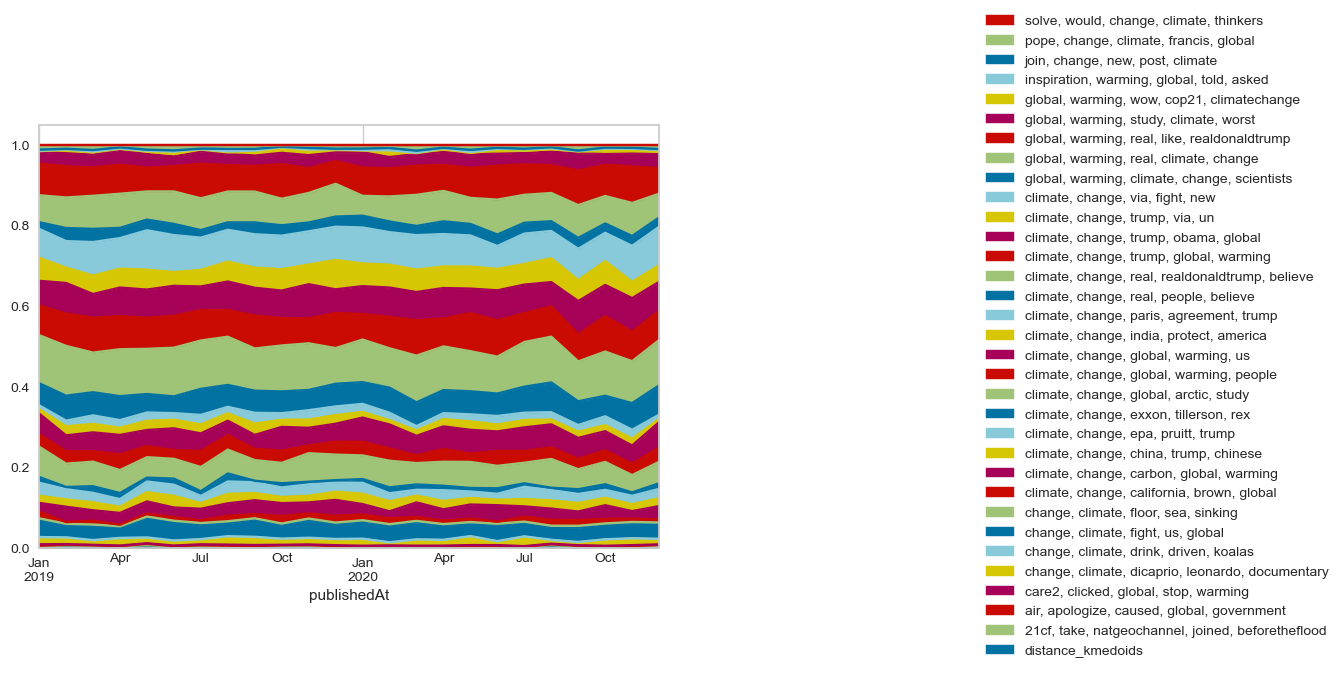

<Figure size 1000x1000 with 0 Axes>

In [63]:
from sklearn import preprocessing

#@markdown Set start and end date
start_date_input = '2019-01-01' #@param {type:"date"}
end_date_input = '2021-01-01' #@param {type:"date"}

#@markdown If true, all samples combined in one bucket will always sum to one.
fill_height = True#@param {type:"boolean"}
#@markdown Specify the interval of the buckets 'M' = Month, 'D' = Day, 'W' = Week and so on
interval ='M'#@param {type:"string"}

#@markdown Specify which labels you want to take: manual (takes manual if available, and groups all others into one group), semi (takes only manual and omits unlabeled ones) Automatic or both (takes manual if available or automatic if not)
labels_viz = 'topwords' #@param ["manual", "semi", "automatic", "both","topwords"]


data_barplot = data

data_barplot["publishedAt"] = pd.to_datetime(data_barplot['publishedAt'])

#set time range
data_barplot = data_barplot[(data_barplot['publishedAt'] >= start_date_input) & (data_barplot['publishedAt'] <= end_date_input)]


if labels_viz == 'manual':
  data_barplot['labels_barplot'] = data_barplot['semi']

elif labels_viz == 'topwords':
  data_barplot['labels_barplot'] = data_barplot['topwords']

elif labels_viz == 'semi':
  data_barplot = data_barplot[data_barplot['semi'] != dummy_label]
  data_barplot['labels_barplot'] = data_barplot['semi']
  


elif labels_viz == 'automatic':
  data_barplot['labels_barplot'] = data_barplot[cluster_method]

elif labels_viz == 'both':
  #create new column, fill with values from manual labels if there, otherwise take vlaues from automatic
  data_barplot['labels_barplot'] = data_barplot['semi']
  #data_barplot.loc[data_barplot['labels_barplot'] == dummy_label , 'labels_barplot'] = data_barplot['labels_kmedoids']
  data_barplot['labels_barplot'] = np.where(data_barplot['labels_barplot'] == dummy_label, data_barplot[cluster_method], data_barplot['labels_barplot'])
  
y = pd.get_dummies(data_barplot.labels_barplot)
#data_barplot = data


#y = pd.get_dummies(data_barplot.label_kmedoids,prefix = 'label')

data_barplot = data_barplot.join(y)


data_barplot = data_barplot.drop([text_column,'tweetid'], axis=1)

data_barplot = data_barplot.groupby(pd.Grouper(key = 'publishedAt', freq = interval)).sum()+1
data_barplot.columns



if fill_height:
  x = data_barplot.values #returns a numpy array
  
  min_max_scaler = preprocessing.Normalizer(norm = 'l1')
  x_scaled = min_max_scaler.fit_transform(x)

  data_barplot = pd.DataFrame(x_scaled, index=data_barplot.index, columns =  data_barplot.columns) 
  
  
  #data_barplot = pd.DataFrame(x_scaled)

ax = data_barplot.plot.area()
plt.figure(figsize=(10, 10))
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
ax.legend(handles[::-1], labels[::-1], loc='right', bbox_to_anchor=(2.1, 0.5))
plt.show()